In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

##### 1. Data Preparation :

In [10]:
#load the dataset
df = pd.read_excel(r"D:\Data Science\New Assignments\Basic stats - 1\Assignmets\Decision Tree\heart_disease.xlsx", sheet_name="Heart_disease")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


##### 2. Exploratory Data Analysis (EDA):

In [14]:
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [52]:
#drop oldpeak column because it containt many null values and the column is not that imp for processing.
df.drop('oldpeak',axis=1,inplace=True)
df.head()

KeyError: "['oldpeak'] not found in axis"

In [54]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,slope,thal,num
0,63,1,typical angina,145,233,True,lv hypertrophy,150,False,downsloping,fixed defect,0
1,41,1,atypical angina,135,203,False,normal,132,False,flat,fixed defect,0
2,57,1,asymptomatic,140,192,False,normal,148,False,flat,fixed defect,0
3,52,1,typical angina,118,186,False,lv hypertrophy,190,False,flat,fixed defect,0
4,57,1,asymptomatic,110,201,False,normal,126,True,flat,fixed defect,0


In [56]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalch      0
exang       0
slope       0
thal        0
num         0
dtype: int64

In [58]:
#data do not contain duplicate values.
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
903    False
904    False
905    False
906    False
907    False
Length: 908, dtype: bool

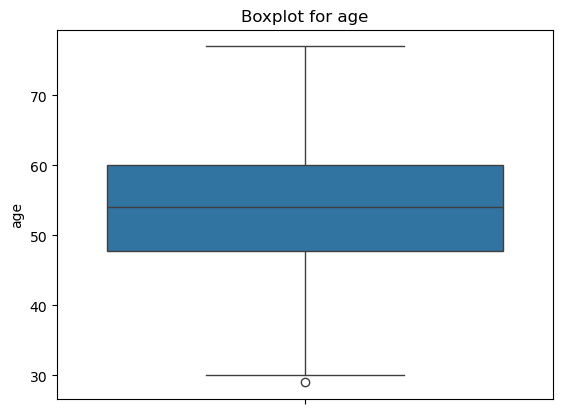

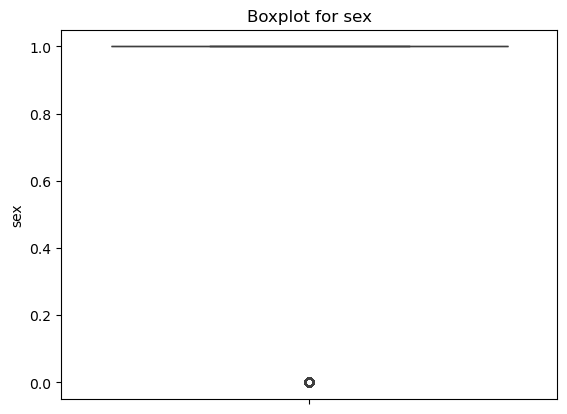

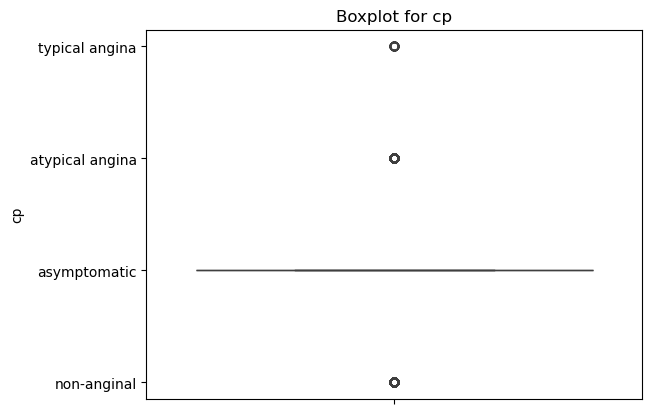

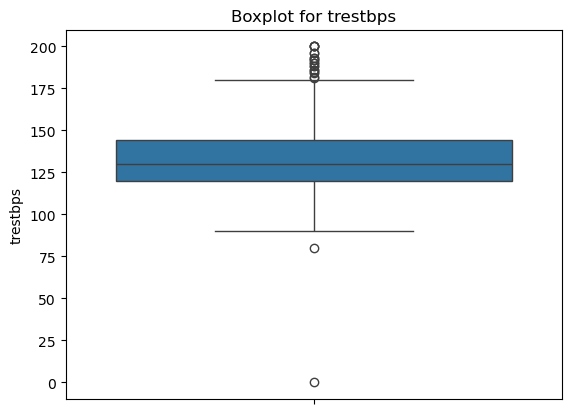

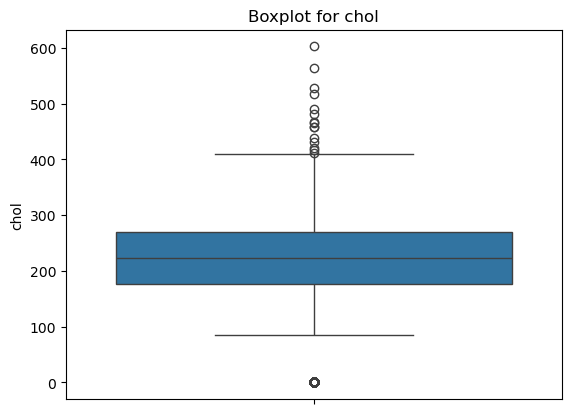

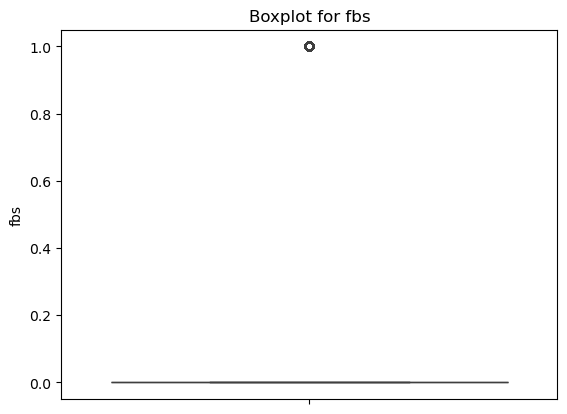

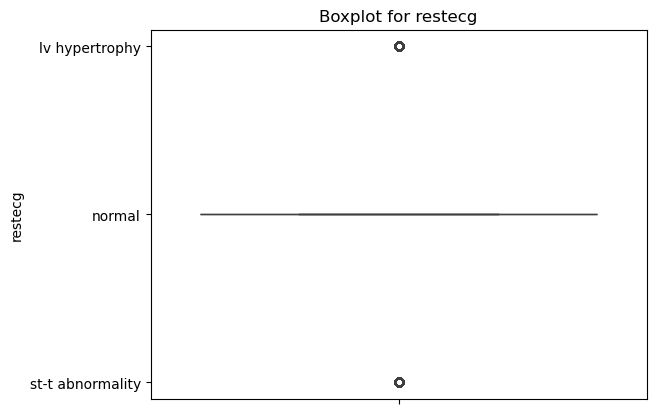

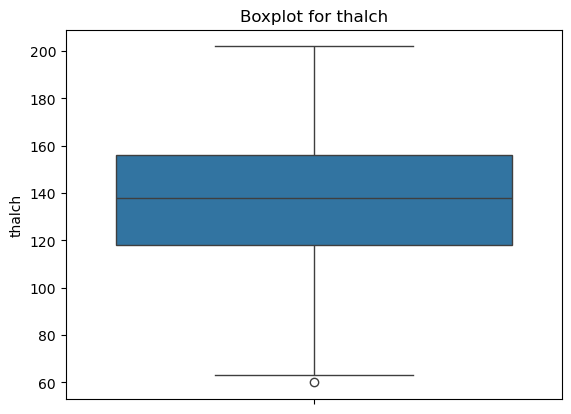

ValueError: Unable to parse string "FALSE" at position 233

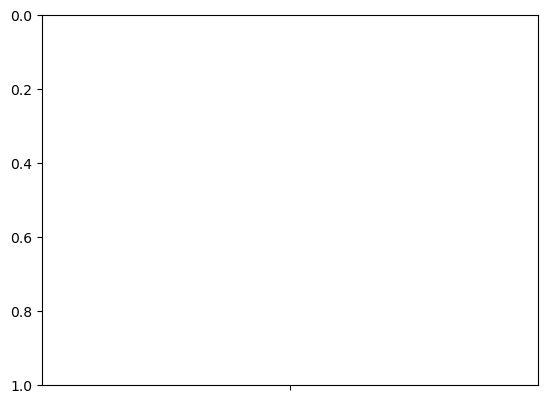

In [48]:
for word in col:
    sns.boxplot(data = df[word])
    plt.title(f"Boxplot for {word}")
    plt.show()

In [32]:
col

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [30]:
for word in col:
    unique_values = df[word].unique()
    print(f"Unique values in {word}: {unique_values}\n")

Unique values in age: [63 41 57 52 66 56 48 53 30 54 37 46 68 76 58 42 64 71 69 45 44 39 62 50
 55 49 43 51 36 59 61 60 67 70 47 65 38 34 35 29 74 75 40 72 31 73 33 32
 77]

Unique values in sex: ['Male' 'Female']

Unique values in cp: ['typical angina' 'atypical angina' 'asymptomatic' 'non-anginal']

Unique values in trestbps: [145 135 140 118 110 160 130 155 170 150 125 120 142 100 102 112 146 138
 134 122 136 108 115 104 128 106 156 129 124 126 132 105 152 148  94 180
 178 101 172  80 114 190 113 154 175 133 131 181 188 193 153 179 143  90
  96 163 161 196 107 167 174 158 192 185 144 169  95  92 200 127 121 166
 177 165 117 116 184  97 186 164 123 151   0 137 182]

Unique values in chol: [233 203 192 186 201 228 276 211 260 175 237 226 273 197 240 250 177 248
 265 303 149 234 160 264 242 302 278 220 294 394 214 219 271 213 245 196
 209 141 340 318 243 238 222 208 236 178 275 308 223 204 269 256 180 360
 239 235 262 257 295 417 212 254 283 244 315 306 342 267 198 215 304 247
 266 252

In [36]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['sex'] = le.fit_transform(df['sex'])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,1,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,1,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,1,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,1,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,1,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,asymptomatic,125,0,False,normal,120,False,1.5,upsloping,reversable defect,4
904,62,1,asymptomatic,166,170,False,st-t abnormality,120,True,3.0,flat,reversable defect,4
905,56,1,non-anginal,170,0,False,lv hypertrophy,123,True,2.5,downsloping,normal,4
906,56,1,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [62]:
col

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [72]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       908 non-null    int64 
 1   sex       908 non-null    int32 
 2   cp        908 non-null    int64 
 3   trestbps  908 non-null    int64 
 4   chol      908 non-null    int64 
 5   fbs       908 non-null    int64 
 6   restecg   908 non-null    int64 
 7   thalch    908 non-null    int64 
 8   exang     908 non-null    object
 9   slope     908 non-null    int32 
 10  thal      908 non-null    int32 
 11  num       908 non-null    int64 
dtypes: int32(3), int64(8), object(1)
memory usage: 74.6+ KB


In [66]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['cp'] = le.fit_transform(df['cp'])
df['restecg'] = le.fit_transform(df['restecg'])
df['slope'] = le.fit_transform(df['slope'])
df['thal'] = le.fit_transform(df['thal'])
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,slope,thal,num
0,63,1,3,145,233,1,0,150,False,0,0,0
1,41,1,1,135,203,0,1,132,False,1,0,0
2,57,1,0,140,192,0,1,148,False,1,0,0
3,52,1,3,118,186,0,0,190,False,1,0,0
4,57,1,0,110,201,0,1,126,True,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,1,0,125,0,0,1,120,False,2,2,4
904,62,1,0,166,170,0,2,120,True,1,2,4
905,56,1,2,170,0,0,0,123,True,0,1,4
906,56,1,2,144,208,1,2,105,TURE,0,0,4


In [74]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['exang'] = le.fit_transform(df['exang'])
df

TypeError: Encoders require their input argument must be uniformly strings or numbers. Got ['bool', 'str']

In [70]:
sns.heatmap(df.corr(),annot=True)
plt.show()

ValueError: could not convert string to float: 'FALSE'

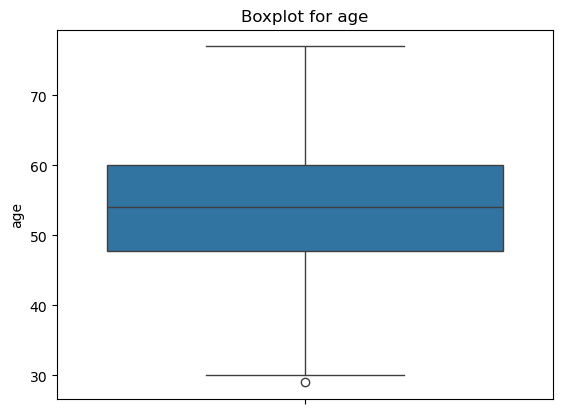

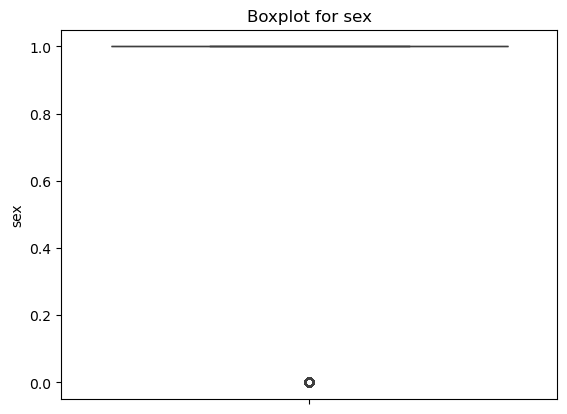

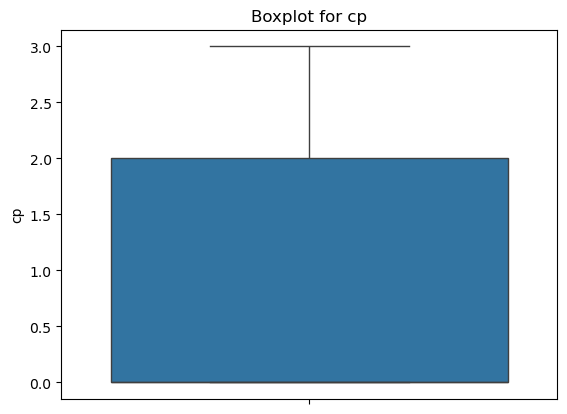

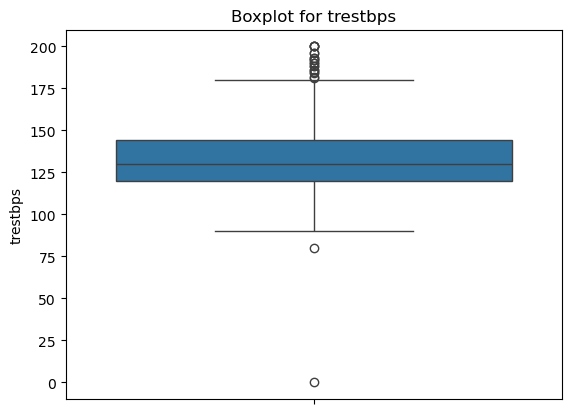

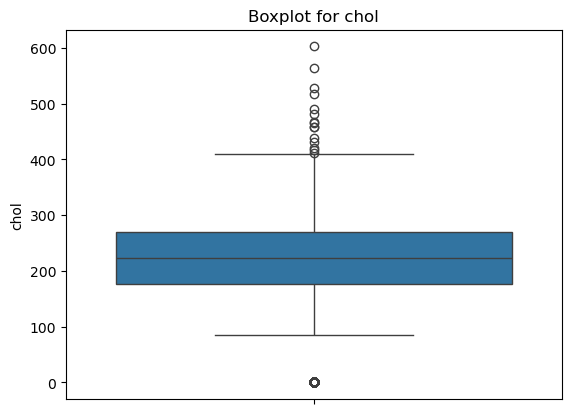

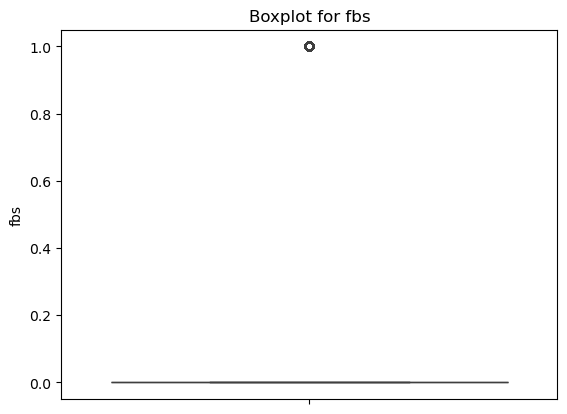

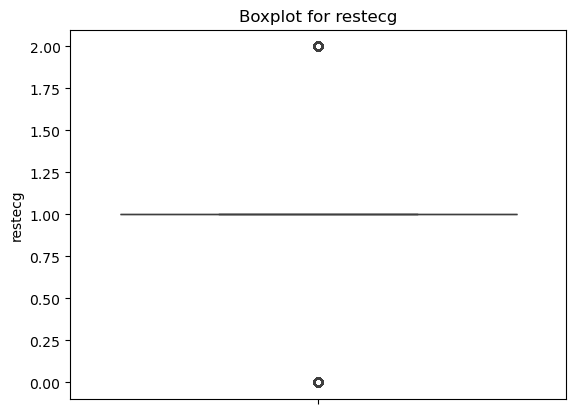

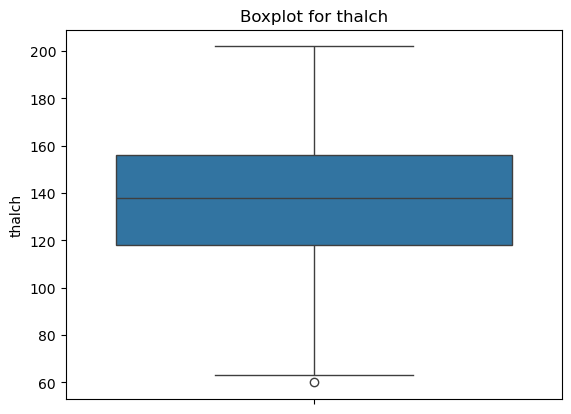

ValueError: Unable to parse string "FALSE" at position 233

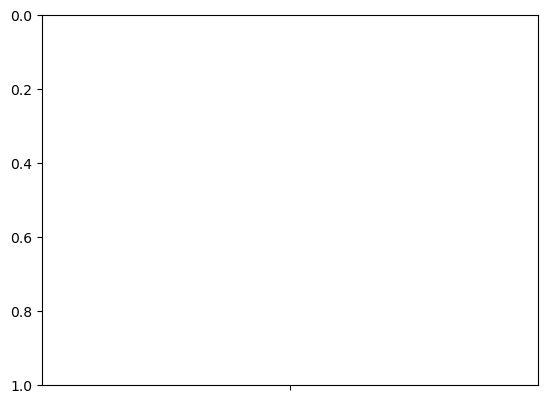

In [68]:
for word in col:
    sns.boxplot(data = df[word])
    plt.title(f"Boxplot for {word}")
    plt.show()

In [76]:
df.corr()

ValueError: could not convert string to float: 'FALSE'